### Group Assignment Week 7

In [204]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import eig

#### **Problem 1**

<font size = 4 color = black face = "Times New Roman">(1)First, we define the matrix A

In [205]:
matrix_A =np.array([[-2,2,-3],
                   [2,1,-6],
                   [-1,-2,0]])

In [206]:
Es,Ev = eig(matrix_A)
print('Eigenvalues are ',Es)
print('Eigenvectors are \n',Ev)

Eigenvalues are  [-3.  5. -3.]
Eigenvectors are 
 [[-0.95257934  0.40824829 -0.02296692]
 [ 0.27216553  0.81649658  0.83534731]
 [-0.13608276 -0.40824829  0.54924256]]


<font size = 4 color = black face = "Times New Roman">Here, we verify that we obtain the eigenvalues $\lambda_1 = 5$, $\lambda_2 = \lambda_3 = −3$.

<font size = 4 color = black face = "Times New Roman">(2)

In [207]:
# Define the test vector.
x1 = np.array([[-1 / np.sqrt(6)],[-2 / np.sqrt(6)],[1 / np.sqrt(6)]])
print(x1)

[[-0.40824829]
 [-0.81649658]
 [ 0.40824829]]


In [208]:
print(np.dot(matrix_A,x1) == 5 * x1) # Test whether x1 is an eigenvector.

[[ True]
 [ True]
 [ True]]


<font size = 4 color = black face = "Times New Roman">Obviously, the eigenvector for $λ_1 = 5$ is proportional to
$$
x_1 = \frac{1}{\sqrt{6}}\begin{pmatrix}
−1 \\ −2 \\+1\end{pmatrix}
$$

<font size = 4 color = black face = "Times New Roman">(3)

<font size = 4 color = black face = "Times New Roman">The eigenvectors are
$$
x_1 = \frac{1}{\sqrt{6}}\begin{pmatrix}
−1 \\ −2 \\+1\end{pmatrix},\quad
x_2 = \frac{1}{\sqrt{5}}\begin{pmatrix}
−2\\ +1\\0\end{pmatrix},\quad
x_3 = \frac{1}{\sqrt{10}}\begin{pmatrix}
3\\ 0\\1\end{pmatrix}
$$
<font size = 4 color = black face = "Times New Roman">Suppose here is a matrix B, where
$$
B = \begin{pmatrix}
x_2 & x_1 & x_3\end{pmatrix}
$$
T<font size = 4 color = black face = "Times New Roman">hen the eigenvector matrix ($Ev$) that we got before can be describled as $Ev = BC$ The values of the vectors in the C matrix are the coefficients of the linear combinations.


<font size = 4 color = black face = "Times New Roman">Hence $C = B^{-1}Ev$

In [209]:
# Define matrix B
matrix_B = np.array([[-2 / np.sqrt(5),-1 / np.sqrt(6),3 / np.sqrt(10)],
                     [1 / np.sqrt(5),-2 / np.sqrt(6),0],
                     [0,1 / np.sqrt(6),1 / np.sqrt(10)]])

In [210]:
C = np.dot(np.linalg.inv(matrix_B),Ev)
print(C)

[[ 6.08580619e-01 -4.36232184e-16  1.86789337e+00]
 [-4.01880650e-17 -1.00000000e+00  4.43399771e-18]
 [-4.30331483e-01 -2.27092718e-16  1.73685749e+00]]


<font size = 4 color = black face = "Times New Roman">Because of the machine precision error in the process of using the program to calculate, some elements which should be zero in the matrix are not zero, but some very small values.
Such as -4.01880650e-17, actually, it should be zero.
    
<font size = 4 color = black face = "Times New Roman">Suppose the two eigenvectors we get for eigenvalue $\lambda_2 = \lambda_3 = −3$ is $a$ and $b$.

<font size = 4 color = black face = "Times New Roman">Then 
$$
a = 0.608580619x_2 - 0.430331483x_3\\
b = 1.86789337x_2 + 1.73685749x_3
$$

#### **Problem 2**

<font size = 4 color = black face = "Times New Roman">In this problem we're going to  fit the Millikan data shown in the table below directly to a linear function
    $$
    q_k=ke\pm\Delta q_k
    $$
Assume that<br>
(1) the error bars $\Delta {q_k}$ in the experimental measurements is a constant as $\Delta q$<br>
(2) Different $\Delta {q_k}$ with $\left\vert\Delta {q_k}\right\vert= 0.05q_k$

|  |  |  |  |  | | |  |  |
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| $k$   | 4     | 5     | 6     | 7     | 8     | 9     | 10    | 11    |
| $q_k$ | 6.558 | 8.206 | 9.880 | 11.50 | 13.14 | 14.82 | 16.40 | 18.04 |
| $k$   | 12    | 13    | 14    | 15    | 16    | 17    | 18    |       |
| $q_k$ | 19.68 | 21.32 | 22.96 | 24.60 | 26.24 | 27.88 | 29.52 |       |

<font size = 4 color = black face = "Times New Roman"> Since the error bars $\Delta {q_k}$ has the relation that $\left\vert\Delta {q_k}\right\vert= 0.05q_k$, we should actually treat $\Delta {q_k}$ as **the uncertainty for the data $q_k$**. Therefore, the linear funtion should be written in the form 
    $$
    q_k\pm\Delta q_k=ke
    $$
First of all, let's enter the data as well as their uncertainty.

In [211]:
k = np.arange(4,19) # data k
q_k = np.array([6.588, 8.206, 9.880, 11.5, 13.14, 14.82, 16.40, 18.04, 19.68, 21.32, 22.96, 24.60, 26.24, 27.88, 29.52]) # data q_k
delta_q_k = np.array([0.05 * q_k for q_k in q_k]) # Uncertainty for q_k

<font size = 4 color = black face = "Times New Roman">Then we define a function to fit data with uncertainty.

In [212]:
def lineFit_with_uncertainty(x, y, uncertainty):
    xavg = (x/(uncertainty**2)).sum()/(1/(uncertainty**2)).sum() # The average for x with uncertainty.
    yavg = (y/(uncertainty**2)).sum()/(1/(uncertainty**2)).sum() # The average for y with uncertainty.
    slope = (y * (x-xavg)/(uncertainty**2)).sum()/(x * (x-xavg)/(uncertainty**2)).sum()
    yint = yavg - slope*xavg
    # The uncertainty for slope and y intercept.
    uncert_slope = 1/(x * (x-xavg)/(uncertainty**2)).sum()
    uncert_yint = uncert_slope**2 * (x**2/(uncertainty**2)).sum()/(1/(uncertainty**2)).sum()
    return slope, yint, uncert_slope, uncert_yint# yint is the y-intercept

<font size = 4 color = black face = "Times New Roman">After that, we start our linear fit. From  $q_k\pm\Delta q_k=ke$, it's clear that the **intercept is 0**, so we directly use this result instead of the intercept calculated.

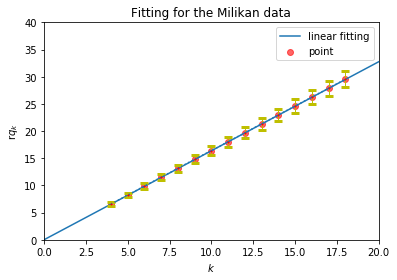

In [213]:
intercept = 0 # Set the inercept 0.
slope = lineFit_with_uncertainty(k, q_k, delta_q_k)[0] # Calculate the slope.
x = np.linspace(0,20,1000)
y = intercept + slope * x
plt.title('Fitting for the Milikan data')
plt.xlabel('$k$')
plt.ylabel('r$q_k$')
plt.plot(x, y) 
plt.xlim(0,20)
plt.ylim(0,40)
plt.scatter(k, q_k, alpha=0.6, color='red')
plt.legend(['linear fitting','point'] )
plt.errorbar(k, q_k, yerr=delta_q_k, fmt=":o", ecolor="y", elinewidth=1,
             ms=1,mfc="c", mec="r", capsize=4, capthick=3)
plt.show()

<font size = 4 color = black face = "Times New Roman"> Directly from the figure above, it seems that the linear fitting is quite good, then we will analyze the accuracy of the approximation in detal.

In [214]:
# Calculate the sum of the square of the residuals, the standard deviation and the chi square.
S = ((q_k - slope *k) **2).sum()
sigma = np.sqrt(S/(15-2))
chi_square = (((q_k - slope *k)/delta_q_k) **2).sum()
print('''The sum of the square of the residuals: S = {:1.10f}
The standard deviation:{:1.10f}
Chi square:{:1.10f}
'''.format(S, sigma, chi_square))

The sum of the square of the residuals: S = 0.0206150833
The standard deviation:0.0398217985
Chi square:0.0482963240



In [215]:
# Calculate the elementary charge e from the data
e = slope
delta_e = lineFit_with_uncertainty(k, q_k, delta_q_k)[2]
print('''e:{:1.10f}e-10 
delta e:{:1.10f}e-10'''.format(e,delta_e))

e:1.6379517547e-10 
delta e:0.0022597268e-10


<font size = 4 color = black face = "Times New Roman"> From the calculation above, we can find:<br>
1.The sum of the square of the residuals $S \approx 0.0206150833$<br>
2.The standard deviation:$\sigma \approx 0.0206150833$<br>
3.$\chi^2 \approx 0.0482963240$ <br>
4.The elementary charge $e = (1.6379517547 \pm 0.0022597268) \times 10^{-10}$<br>

<font size = 4 color = black face = "Times New Roman"> $S$, $\sigma$ and $\chi^2$ are all very small. Besides, the elementary charge calculated is quite close the the standard value $1.60217663410 \times 10^{-10}$. These can all show that the approximation is accurate.   

#### **Problem 3**

<font size = 4 color = black face = "Times New Roman">
Derive the linearization form for each of the following functions:
$$
    \begin{array}{llll}
    (1) &y=\dfrac{A}{x}+B  &    (2) &y=\dfrac{D}{x+C}\\
    (3) &y=\dfrac{1}{Ax+B} &    (4) &y=\dfrac{x}{A+Bx}\\
    (5) &y=A\ln x+B &      (6)& y=Cx^{A}\\
    (7) &y=\left( Ax+B\right) ^{-2} &   (8) & y=Cxe^{-Dx}
    \end{array}
    $$

<font size = 4 color = black face = "Times New Roman">
(1)$y=\dfrac{A}{x}+B$ <br>
Data linearization: introduce the change of variables:
$$
Y = y,\; X = \dfrac{1}{x}\\
(x_{i},y_{i})\rightarrow(X_{i},Y_{i})\\
Y = AX +B
$$
<br> 
(2)$y=\dfrac{D}{x+C}$<br>
Take the reciprocal on both sides:
$$
\dfrac{1}{y} = \dfrac{1}{D}x + \dfrac{C}{D}
$$
Data linearization: introduce the change of variables:
$$
Y = \dfrac{1}{y},\; X = x\\
(x_{i},y_{i})\rightarrow(X_{i},Y_{i})\\
Y= \dfrac{1}{D}X + \dfrac{C}{D}
$$
<br>
(3)$y=\dfrac{1}{Ax+B}$<br>
Take the reciprocal on both sides:
$$
\dfrac{1}{y} = Ax + B
$$
Data linearization: introduce the change of variables:
$$
Y = \dfrac{1}{y},\; X = x\\
(x_{i},y_{i})\rightarrow(X_{i},Y_{i})\\
Y= AX + B
$$
<br>
(4)$y=\dfrac{x}{A+Bx}$<br>
Take the reciprocal on both sides:
$$
\dfrac{1}{y} = \dfrac{A}{x} + B
$$
Data linearization: introduce the change of variables:
$$
Y = \dfrac{1}{y},\; X = \dfrac{1}{x}\\
(x_{i},y_{i})\rightarrow(X_{i},Y_{i})\\
Y= AX + B
$$
<br>
(5)$y=A\ln x+B$<br>
Data linearization: introduce the change of variables:
$$
Y = y,\; X = lnx\\
(x_{i},y_{i})\rightarrow(X_{i},Y_{i})\\
Y= AX + B
$$
<br>
(6)$y=Cx^{A}$<br>
Take the logarithm on both sides:
$$
lny = Alnx+lnC
$$   
Data linearization: introduce the change of variables:
$$
Y = lny,\; X = lnx\\
(x_{i},y_{i})\rightarrow(X_{i},Y_{i})\\
Y= AX + lnC
$$
<br>
(7)$y=\left( Ax+B\right) ^{-2}$<br>
First, take the reciprocal on both sides:
$$
\dfrac{1}{y} = (Ax +B) ^{2}
$$   
Then, take the square root on both sides:
$$
\pm\sqrt{\dfrac{1}{y}} = Ax +B
$$   
Data linearization: introduce the change of variables:
$$
Y = \sqrt{\dfrac{1}{y}},\; X = lnx\\
(x_{i},y_{i})\rightarrow(X_{i},Y_{i})\\
Y= 
\begin{cases}
AX + B & if Ax +b > 0 \\
-AX - B & if Ax +b < 0
\end{cases}
$$
<br>
(8)$y=Cxe^{-Dx}$<br>
Take the logarithm on both sides:
$$
lny = lnx+lnC-Dx \\
ln(\dfrac{y}{x}) = -Dx +lnC
$$   
Data linearization: introduce the change of variables:
$$
Y = ln(\dfrac{y}{x}),\; X = x\\
(x_{i},y_{i})\rightarrow(X_{i},Y_{i})\\
Y= -DX + lnC
$$

#### **Problem 4**

<font size = 4 color = black face = "Times New Roman">Introduction: We will use two method in this problem, direct fitting and fitting with weighs, to explore Hubble's law. At the end of the problem, we will compare this two methods.

In [216]:
r = np.array([0.032, 0.9, 0.9, 0.275, 1.1, 
            0.9, 0.214, 0.263, 1.1, 0.45,
            0.034, 2.0, 1.0, 0.275,1.4, 
            0.5, 2.0, 0.8, 1.7, 0.63,
            2.0, 0.5, 2.0, 0.9])
v = np.array([170, 150, 500, -185, 500,
             650, -130, -70, 450, 200,
             290, 1090, 920, -220, 500,
             290, 500, 300, 960, 200,
             800, 270, 850, -30])

<font size = 4 color = black face = "Times New Roman">Method 1: direct fitting

<font size = 3 color = black face = "Times New Roman"> (1)

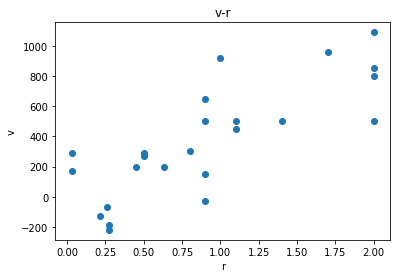

In [217]:
plt.scatter(r, v)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')
plt.show()

<font size = 4 color = black face = "Times New Roman"> Although the points in the diagram are scattered, we can find that most points are distributed around a straight line.

<font size = 4 color = black face = "Times New Roman"> (2)

<font size = 4 color = black face = "Times New Roman"> Here we use 10% of the data as the error.

In [218]:
error = 0.1 * v
error

array([ 17. ,  15. ,  50. , -18.5,  50. ,  65. , -13. ,  -7. ,  45. ,
        20. ,  29. , 109. ,  92. , -22. ,  50. ,  29. ,  50. ,  30. ,
        96. ,  20. ,  80. ,  27. ,  85. ,  -3. ])

<font size = 4 color = black face = "Times New Roman"> (3)

In [219]:
def lineFit1(x, y):
    xavg = x.mean()
    slope = (y * (x-xavg)).sum()/(x * (x-xavg)).sum()
    yint = y.mean() - slope*xavg
    return slope, yint, xavg

In [220]:
H, a, r_avg = lineFit1(r, v)
print(H, a)

454.1584409226284 -40.783649095860426


<font size = 4 color = black face = "Times New Roman"> We get $H = 454.15$ and $a = -40.78$. But this value is far from the right value. Recent observed value of $H$ is about 80.

<font size = 4 color = black face = "Times New Roman"> (4)

In [221]:
def f(r):
    return H*r - a

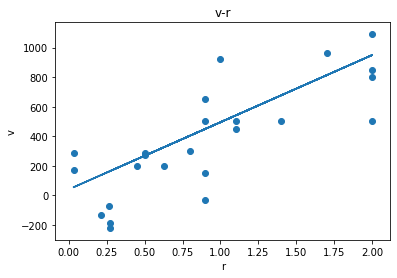

In [222]:
v_fit = f(r)
plt.plot(r, v_fit)
plt.scatter(r, v)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')
plt.show()

<font size = 4 color = black face = "Times New Roman">This picture looks pretty reasonable.

<font size = 3 color = black face = "Times New Roman"> (5)

In [223]:
S = ((f(r) - v)**2).sum()
sigma = (S/22)**(0.5)
variance = sigma ** 2
print(variance)
print(sigma)

61505.44297705776
248.00290921087552


<font size = 4 color = black face = "Times New Roman">Here we get variance 61505 and the standard deviation $\sigma = 248$.

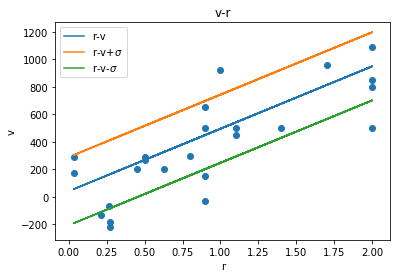

In [224]:
v_fit = f(r)
plt.plot(r, v_fit, label = 'r-v')
plt.plot(r, v_fit + sigma, label = 'r-v+$\sigma$')
plt.plot(r, v_fit - sigma, label = 'r-v-$\sigma$')
plt.scatter(r, v)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')
plt.legend(loc=0,ncol=1)
plt.show()

<font size = 4 color = black face = "Times New Roman"> We can see about 7(about a third) points miss the error band. This is in line with our expectations.

<font size = 4 color = black face = "Times New Roman"> (6)

In [225]:
x_2 = ((f(r) - v)**2/error**2).sum()
print(x_2)

28428.556282508023


<font size = 4 color = black face = "Times New Roman">We get $\chi^2 = 28428$.

<font size = 4 color = black face = "Times New Roman"> This is much larger than our expected value, because we're taking 10% of v as the error, which leads to the fact that the smaller the absolute value of v, the smaller the error, and the more dominant the calculation.For example, the error of point (0.9, -30) is only -3 compared with other points, which plays a big role in the calculation. However, although the point (2.0, 1090) is very accurate, because the value of the function v is too large, its role in the calculation is very small.

------------

<font size = 4 color = black face = "Times New Roman">Method 2: fitting with weighs 

<font size = 4 color = black face = "Times New Roman">Problem (1) and (2) are same with method 1, here we don't do that once again.

<font size = 4 color = black face = "Times New Roman">(3)

In [226]:
def lineFit2(x, y, error):
    xavg = ( (x / error**2).sum() ) / ( (1 / (error**2)).sum() )
    yavg = ( (y / error**2).sum() ) / ( (1 / (error**2)).sum() )
    a1 = ( ((x - xavg)*y/error**2).sum() ) / ( ((x - xavg)*x/error**2).sum() )
    a0 = yavg - xavg * a1
    return a1, a0, xavg, yavg

In [227]:
H, a, r_avg, v_avg = lineFit2(r, v, error)
print(H, a)

85.43587291492658 -70.45211155377314


<font size = 4 color = black face = "Times New Roman">We get $H = 85.44$ and $a = -70.45$.

<font size = 4 color = black face = "Times New Roman">This result is very amazing as this number is very close to the modern observed value of $H$.

<font size = 4 color = black face = "Times New Roman">(4)

In [228]:
def f(r):
    return H*r - a

85.43587291492658 -70.45211155377314


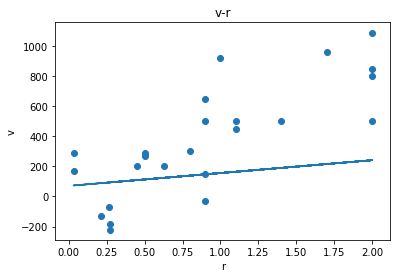

In [229]:
v_fit = f(r)
plt.plot(r, v_fit)
plt.scatter(r, v)
print(H,a)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')
plt.show()

<font size = 4 color = black face = "Times New Roman">This picture doesn't looks very good. It seems that the little values of v dominate this fitting. That's because we're taking 10% of v as the error, which leads to the fact that the smaller the absolute value of v, the smaller the error, and the more dominant the calculation.

<font size = 4 color = black face = "Times New Roman">(5)

In [230]:
S = ((f(r) - v)**2).sum()
sigma = (S/22)**(0.5)
variance = sigma ** 2
print(variance)
print(sigma)
sigma_H = np.sqrt(1 / ((r - r_avg)*r/error**2).sum() )
sigma_a = sigma_H * np.sqrt( (r**2/error**2).sum() / (1/error**2).sum() )
print(sigma_H, sigma_a)

168603.94840233718
410.6141113044426
8.251567403207645 6.602587168956392


<font size = 4 color = black face = "Times New Roman">We get the variance:168604, the standard deviation $\sigma = 410.61$, $\sigma_H = 8.25$ and $\sigma_a = 6.6$. It seems a good solution.

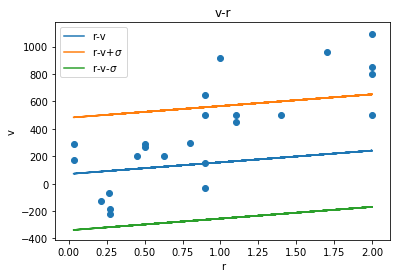

In [231]:
v_fit = f(r)
plt.plot(r, v_fit, label = 'r-v')
plt.plot(r, v_fit + sigma, label = 'r-v+$\sigma$')
plt.plot(r, v_fit - sigma, label = 'r-v-$\sigma$')
plt.scatter(r, v)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')
plt.legend(loc=0,ncol=1)
plt.show()

<font size = 4 color = black face = "Times New Roman"> We can see about 6(about a third) points miss the error band. This is in line with our expectations.

<font size = 4 color = black face = "Times New Roman"> (6)

In [232]:
x_2 = ((f(r) - v)**2/error**2).sum()
print(x_2)

5523.327896730666


<font size = 4 color = black face = "Times New Roman">We get $\chi^2 = 5523$. It means that we get a better fitting, but this is also very large. That's because the error of the points is much large in fact.

<font size = 4 color = black face = "Times New Roman">Conslusion: Using method 1, we can get a relatively pretty picture, but the data we calculate is really awful. While using method 2, we can get an surprising value of $H$ and a lower $\chi^2$, which means we get a better fitting, but the picture is not very good. Here one explain we can get of that is in Hubble's period, the error of the data is a little big, and the larger the $r$ is, the larger error $\sigma$ the $v$ has. So when fitting with weighs, the effect of the larger v is small, so we get an accurate $H$.

<font color=red size=5> Not very reasonable

#### **Problem 5**

In [233]:
# Define data points.
T = np.array([50,100,150,200,400,600,800,1000])
k = np.array([28,9.1,4.0,2.7,1.1,0.6,0.4,0.3]) # The data for kappa

In [234]:
# Define the linear fitting function
def linear_fitting(A,B):
    n = len(A)
    A_average = np.mean(A)
    B_average = np.mean(B)
    a_1 = sum((A[i] - A_average) * B[i] for i in range(n)) / sum((A[i] - A_average) * A[i] for i in range(n))
    a_0 = B_average - a_1 * A_average
    def f(x):
        return a_0 + a_1 * x
    # The sum of the squares of the residuals
    res = sum((B[i] - f(A[i])) ** 2 for i in range(n))
    # The standard deviation
    s = np.sqrt(res / (n - 2))
    return a_0, a_1, res, s

#### Power function


<font size = 4 color = black face = "Times New Roman">In this case, $\kappa = f(T) = aT^b$ thus $ln\kappa = ln a + blnT.$

In [235]:
lnT = np.log(T)
lnk = np.log(k)

In [236]:
a,b,res,s = linear_fitting(lnT,lnk)
print(np.exp(a),b)

8441.641522899785 -1.4940377457085166


In [237]:
fitting_value_P = np.exp(a) * T ** b
print(fitting_value_P)

[24.44002188  8.67663672  4.73439432  3.08035832  1.09358127  0.59671104
  0.38824054  0.27817216]


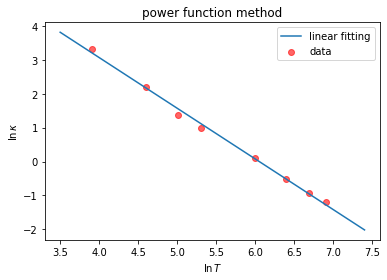

In [238]:
x = np.arange(3.5,7.5,0.1)
y = a + b * x
plt.title('power function method')
plt.xlabel(r'$\ln\,T$')
plt.ylabel(r'$\ln\,\kappa$')
plt.plot(x, y) 
plt.scatter(lnT, lnk, alpha=0.6, color='red')
plt.legend(['linear fitting','data'] )
plt.show()

<font size = 4 color = black face = "Times New Roman">Hence $\kappa = 8441.6T^{-1.5} $ 

#### Exponential function

<font size = 4 color = black face = "Times New Roman">In this case, $\kappa = f(T) = ae^{bT}$ thus $ln\kappa = ln a + bT.$

In [239]:
lnk = np.log(k)

In [240]:
a,b,res,s = linear_fitting(T,lnk)
print(np.exp(a),b)

10.89029722611228 -0.0041571914432840555


In [241]:
fitting_value_E = np.exp(a) * np.exp(T * b)
print(fitting_value_E)

[8.84641824 7.1861322  5.83744682 4.74188123 2.06472212 0.89902662
 0.39145648 0.17044899]


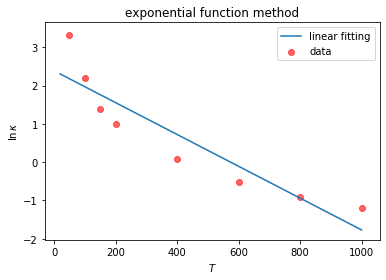

In [242]:
x = np.arange(20,1000,0.1)
y = a + b * x
plt.title('exponential function method')
plt.xlabel('$T$')
plt.ylabel(r'$\ln\,\kappa$')
plt.plot(x, y) 
plt.scatter(T, lnk, alpha=0.6, color='red')
plt.legend(['linear fitting','data'] )
plt.show()

<font size = 4 color = black face = "Times New Roman">Hence $\kappa = 10.890e^{-0.04T}$

#### Saturation function method

<font size = 4 color = black face = "Times New Roman">In this case, $\kappa = f(T) = \dfrac{T}{aT+b}$ thus $\dfrac{1}{\kappa} = a + b\dfrac{1}{T}$.

In [243]:
one_T = 1. / T
one_k = 1. / k

In [244]:
a,b,res,s = linear_fitting(one_T,one_k)
print(a,b)

1.9352560475373126 -131.1677512353447


In [245]:
fitting_value_S = T / (a * T + b)
print(fitting_value_S)

[-1.4532793   1.60364725  0.94268088  0.78160582  0.62214719  0.58253226
  0.56455827  0.5542966 ]


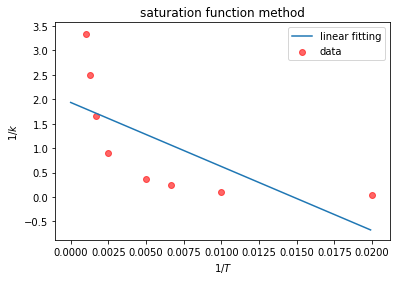

In [246]:
x = np.arange(0,0.02,0.0001)
y = a + b * x
plt.title('saturation function method')
plt.xlabel('$1/T$')
plt.ylabel('$1/k$')
plt.plot(x, y) 
plt.scatter(one_T, one_k, alpha=0.6, color='red')
plt.legend(['linear fitting','data'] )
plt.show()

<font size = 4 color = black face = "Times New Roman">Hence $\kappa = \dfrac{T}{1.9 T -131.2 }$

#### Conclusion

In [247]:
print('T\t\tk\t\tpower\t\texponential\t\tsaturation')
print(100 * '-')
for i in range(len(T)):
    print(f'{T[i]:<.0f}\t\t{k[i]}\t\t{fitting_value_P[i]:<5f}\t{fitting_value_E[i]:<5f}\t\t{fitting_value_S[i]:<5f}')

T		k		power		exponential		saturation
----------------------------------------------------------------------------------------------------
50		28.0		24.440022	8.846418		-1.453279
100		9.1		8.676637	7.186132		1.603647
150		4.0		4.734394	5.837447		0.942681
200		2.7		3.080358	4.741881		0.781606
400		1.1		1.093581	2.064722		0.622147
600		0.6		0.596711	0.899027		0.582532
800		0.4		0.388241	0.391456		0.564558
1000		0.3		0.278172	0.170449		0.554297


<font size = 4 color = black face = "Times New Roman">From the plot and figures, we are easy to know that power function can best fit the data. Thus $\kappa = 8441.6T^{-1.5}$

<font color=red size=5> 9 points

<font color=red size=5> 阅